In [37]:
# S&P 500 Beta Volatility Calculation
# This is a measure of volatility, and is useful as a benchmark to compare the performance of a 
# portfolio, with the performance (beta) of a market index, such as the S&P500

# The beta will be compared to linear regression

# Beta is a measure of a stock’s volatility in relation to the overall market (S&P 500). 
# The S&P 500 index has Beta 1.

# High-beta stocks are supposed to be riskier but provide higher potential return. 
# While, low-beta stocks pose less risk but also lower returns.

# Interpretation;

# Beta above 1: stock is more volatile than the market, but expects higher return.
# Beta below 1: stock with lower volatility, and expects less return.
# The formula for Beta is Covariance divided by variance.

import pandas_datareader.data as pdr
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.linear_model import LinearRegression

import yfinance as yfin
yfin.pdr_override()

# To get around a breaking change in the yahoo finance API

tickers = ['NVDA', 'INTC', 'AMD', 'TSM', '^GSPC']
start = dt.datetime(2017, 4, 3)
end = dt.datetime(2023, 5, 3)

data = pdr.get_data_yahoo(tickers, start, end, interval="1mo")
# 1mo for monthly intervals

[*********************100%***********************]  5 of 5 completed


In [9]:
data.head()

Adj Close                                                Close  \
                 AMD       INTC       NVDA        TSM        ^GSPC    AMD   
Date                                                                        
2017-05-01     11.19  30.419432  35.623615  29.454527  2411.800049  11.19   
2017-06-01     12.48  28.634369  35.713024  29.121330  2423.409912  12.48   
2017-07-01     13.61  30.102583  40.147503  30.930317  2470.300049  13.61   
2017-08-01     13.00  29.763102  41.859524  31.799051  2471.649902  13.00   
2017-09-01     12.75  32.560230  44.203358  32.297932  2519.360107  12.75   

                                                          ...   Open  \
                 INTC       NVDA        TSM        ^GSPC  ...    AMD   
Date                                                      ...          
2017-05-01  36.110001  36.087502  35.360001  2411.800049  ...  13.43   
2017-06-01  33.740002  36.139999  34.959999  2423.409912  ...  11.25   
2017-07-01  35.470001  40.627499  35.959999  2470.300049  ...  12.57   
2017-08-01  35.070000  42.360001  36.970001  2471.649902  ...  13.72   
2017-09-01  38.080002  44.692501  37.549999  2519.360107  ...  13.12   

                                                              Volume  \
                 INTC       NVDA        TSM        ^GSPC         AMD   
Date                                                                   
2017-05-01  36.110001  26.184999  33.160000  2388.500000  1716437000   
2017-06-01  36.119999  36.247501  35.700001  2415.649902  2208152100   
2017-07-01  33.509998  36.262501  35.040001  2431.389893  1710461400   
2017-08-01  35.660000  40.532501  35.950001  2477.100098  1190382100   
2017-09-01  35.240002  42.487499  37.000000  2474.419922  1209201600   

                                                           
                 INTC        NVDA        TSM        ^GSPC  
Date                                                       
2017-05-01  432927300  1920944400  142700200  79719460000  
2017-06-01  499455600  2344552000  149609800  81078810000  
2017-07-01  440860400  1549101600  136585200  63348090000  
2017-08-01  497303200  1472821600   88241100  70784900000  
2017-09-01  431948900  1444733600  114880900  66624120000  

[5 rows x 30 columns]

In [10]:
data = data['Adj Close']
data.head()

,AMD,INTC,NVDA,TSM,^GSPC
Date,,,,,
2017-05-01,11.19,30.419432,35.623615,29.454527,2411.800049
2017-06-01,12.48,28.634369,35.713024,29.121330,2423.409912
2017-07-01,13.61,30.102583,40.147503,30.930317,2470.300049
2017-08-01,13.00,29.763102,41.859524,31.799051,2471.649902
2017-09-01,12.75,32.560230,44.203358,32.297932,2519.360107


In [11]:
log_returns = np.log(data/data.shift())

In [12]:
log_returns

,AMD,INTC,NVDA,TSM,^GSPC
Date,,,,,
2017-05-01,NaN,NaN,NaN,NaN,NaN
2017-06-01,0.109107,-0.060474,0.002507,-0.011377,0.004802
2017-07-01,0.086677,0.050003,0.117045,0.060266,0.019164
2017-08-01,-0.045855,-0.011342,0.041759,0.027700,0.000546
2017-09-01,-0.019418,0.089822,0.054481,0.015567,0.019119
...,...,...,...,...,...
2023-01-01,0.148644,0.066948,0.290330,0.224679,0.059921
2023-02-01,0.044631,-0.125375,0.172532,-0.062980,-0.026459
2023-03-01,0.220952,0.282497,0.179367,0.066102,0.034451


In [15]:
cov = log_returns.cov()
cov

,AMD,INTC,NVDA,TSM,^GSPC
AMD,0.026633,0.002728,0.014967,0.008996,0.005129
INTC,0.002728,0.007871,0.005259,0.002690,0.002168
NVDA,0.014967,0.005259,0.019704,0.007656,0.004647
TSM,0.008996,0.002690,0.007656,0.009542,0.002831
^GSPC,0.005129,0.002168,0.004647,0.002831,0.002532


In [18]:
var = log_returns['^GSPC'].var()
var

0.0025323590138010546

In [21]:
cov.loc['INTC', '^GSPC']/var
# Yahood finance list a 5 year monthly Beta as 0.88, this is a small discrepency from exactly when Yahoo
# Finance last calculated the Beta.

# This Beta value of 0.86 means that if the S&P500 went up 10%, Intel Corporation would go down
# 100% - 86% + 10% = 4%

0.856308241635893

In [23]:
# Calculating the covariance and Beta for each of the stocks in the semi-conductor portfolio
cov.loc['^GSPC']/var

AMD      2.025378
INTC     0.856308
NVDA     1.834917
TSM      1.118055
^GSPC    1.000000
Name: ^GSPC, dtype: float64

In [26]:
# Calculating the Beta using a different method
X = log_returns['^GSPC'].iloc[1:].to_numpy().reshape(-1, 1)
Y = log_returns['INTC'].iloc[1:].to_numpy().reshape(-1, 1)
lin_regr = LinearRegression()
lin_regr.fit(X, Y)
lin_regr.coef_[0, 0]


# Which is the same result.

0.8563082416358934

In [30]:
def linear_regression(ticker_a, ticker_b):
    X = log_returns[ticker_a].iloc[1:].to_numpy().reshape(-1, 1)
    Y = log_returns[ticker_b].iloc[1:].to_numpy().reshape(-1, 1)
    lin_regr = LinearRegression()
    lin_regr.fit(X, Y)
    Y_pred = lin_regr.predict(X)
    alpha = lin_regr.intercept_[0]
    beta = lin_regr.coef_[0, 0]
    fig, ax = plt.subplots()
    ax.set_title("Alpha: " + str(round(alpha, 5)) + ", Beta: " + str(round(beta, 3)))
    ax.scatter(X, Y)
    ax.plot(X, Y_pred, c='r')

<IPython.core.display.Javascript object>


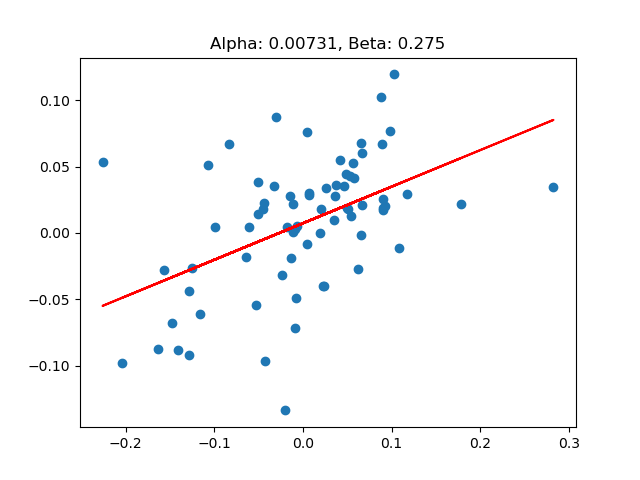

In [38]:
linear_regression('INTC', '^GSPC')

<IPython.core.display.Javascript object>


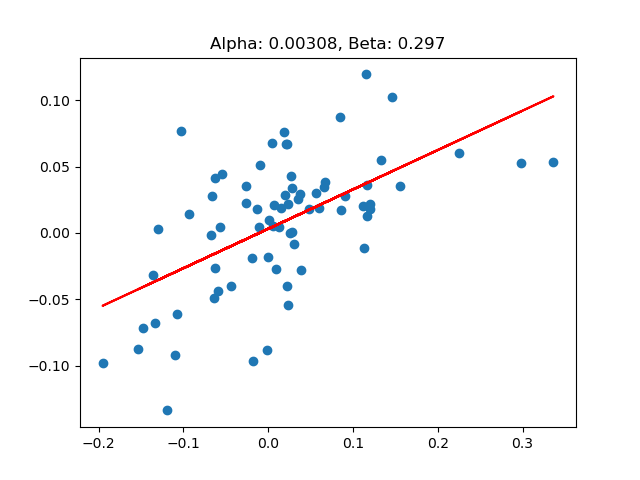

In [40]:
linear_regression('TSM', '^GSPC')

<IPython.core.display.Javascript object>


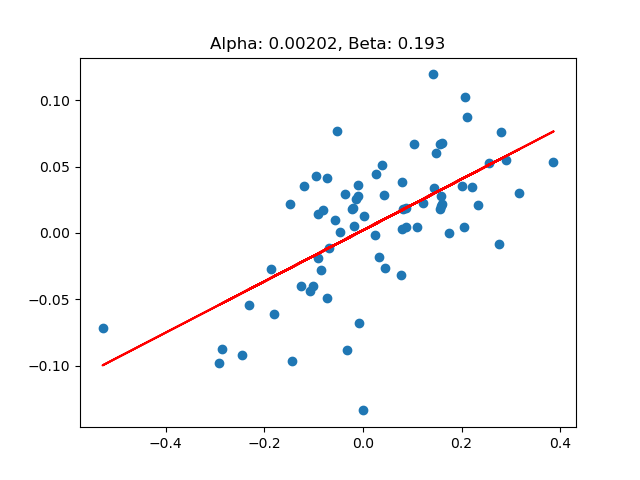

In [41]:
linear_regression('AMD', '^GSPC')

In [42]:
# Calculating the rolling Beta for a portfolio of stocks

window = 252
rolling_var = log_returns['^GSPC'].rolling(window).var()
rolling_cov = log_returns.rolling(window).cov()
beta = rolling_cov.loc[:,'^GSPC']/rolling_var
beta = beta.dropna().unstack()

In [47]:
log_returns

,AMD,INTC,NVDA,TSM,^GSPC
Date,,,,,
2017-05-01,NaN,NaN,NaN,NaN,NaN
2017-06-01,0.109107,-0.060474,0.002507,-0.011377,0.004802
2017-07-01,0.086677,0.050003,0.117045,0.060266,0.019164
2017-08-01,-0.045855,-0.011342,0.041759,0.027700,0.000546
2017-09-01,-0.019418,0.089822,0.054481,0.015567,0.019119
...,...,...,...,...,...
2023-01-01,0.148644,0.066948,0.290330,0.224679,0.059921
2023-02-01,0.044631,-0.125375,0.172532,-0.062980,-0.026459
2023-03-01,0.220952,0.282497,0.179367,0.066102,0.034451
